In [1]:
import mpl_toolkits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import matplotlib
import collections
import ast
#from mpl_toolkits.basemap import Basemap
import sys
sys.path.append('../data_exploration')
from load_yelp_data import load_yelp_dataframe
from load_yelp_data import create_standard_train_and_test
%matplotlib inline

In [2]:
businesses = load_yelp_dataframe('businesses').drop('Unnamed: 0', 1)
reviews = load_yelp_dataframe('reviews').drop('Unnamed: 0', 1)
users = load_yelp_dataframe('users').drop('Unnamed: 0', 1)

[(businesses_train,businesses_test),
 (reviews_train,reviews_test),
 (users_train, users_test)]=create_standard_train_and_test([businesses, reviews, users])

In [3]:
businesses_train

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,location
7471,"{'Accepts Credit Cards': True, 'Price Range': ...",7471,"['Local Services', 'Musical Instrument Service...",Tempe,"1245 W Elliot Road\nSte 115\nTempe, AZ 85284","{'Monday': {'close': '21:00', 'open': '10:00'}...",33.348163,-111.957999,Guitar Center,[],True,33,3.0,AZ,business,Phoenix
54555,{'Accepts Credit Cards': True},54555,"['Automotive', 'Smog Check Stations']",Phoenix,"4949 E Madison St\nPhoenix, AZ 85034",{},33.444571,-111.974791,ADEQ Emissions Testing Station,[],True,22,4.0,AZ,business,Phoenix
55961,{'Accepts Credit Cards': True},55961,"['Tires', 'Automotive']",Surprise,"16131 W Bell Rd\nSurprise, AZ 85374","{'Monday': {'close': '18:00', 'open': '08:00'}...",33.638446,-112.406242,"Discount Tire Store - Surprise, AZ",[],True,31,3.5,AZ,business,Phoenix
6514,"{'Accepts Credit Cards': True, 'Price Range': ...",6514,"['Flowers & Gifts', 'Shopping', 'Florists']",Scottsdale,"10822 N Scottsdale Rd\nScottsdale, AZ 85254","{'Monday': {'close': '18:00', 'open': '08:00'}...",33.585253,-111.926458,Cactus Flower Florists,[],True,58,4.0,AZ,business,Phoenix
24551,"{'By Appointment Only': True, 'Accepts Insuran...",24551,"['Pediatric Dentists', 'Health & Medical', 'De...",Phoenix,"5315 E High St\nSte 115\nPhoenix, AZ 85054","{'Monday': {'close': '17:00', 'open': '08:00'}...",33.675984,-111.964429,Desert Ridge Pediatric Dentistry,[],True,22,4.5,AZ,business,Phoenix
81257,{},81257,"['Auto Repair', 'Automotive', 'Transmission Re...",Mesa,"2730 E Baseline Rd\nMesa, AZ 85204","{'Monday': {'close': '18:00', 'open': '07:00'}...",33.379574,-111.772697,Evolution Automotive,[],True,3,4.0,AZ,business,Phoenix
60994,"{'Accepts Credit Cards': True, 'Waiter Service...",60994,"['Seafood', 'Mexican', 'Restaurants']",Mesa,"1040 W Broadway Rd\nMesa, AZ 85210",{},33.407959,-111.853661,Bahia De Kino,[],True,5,3.0,AZ,business,Phoenix
37744,"{'By Appointment Only': True, 'Accepts Insuran...",37744,"['Health & Medical', 'Dentists', 'Cosmetic Den...",Gilbert,"3011 S Lindsay Rd\nSte 118\nGilbert, AZ 85295","{'Tuesday': {'close': '17:00', 'open': '07:00'...",33.295216,-111.773191,Creative Smiles,[],True,7,4.5,AZ,business,Phoenix
23741,{'Accepts Credit Cards': True},23741,"['Local Services', 'Shipping Centers', 'Printi...",Tempe,"4435 S Rural Rd\nTempe, AZ 85282","{'Monday': {'close': '17:45', 'open': '09:00'}...",33.384166,-111.926299,FedEx Office Ship Center,[],True,10,3.0,AZ,business,Phoenix
36232,"{'Accepts Credit Cards': True, 'Wheelchair Acc...",36232,"['Day Spas', 'Beauty & Spas', 'Nail Salons']",Phoenix,"1660 E Camelback Rd\nPhoenix, AZ 85016",{},33.510322,-112.046343,Pretty Nails,[],True,53,3.0,AZ,business,Phoenix


In [16]:
# Classify the datapoints into the cities based on the latitude and the longitude
cities = np.array([['Edinburgh', 55.9533, -3.1883, 0, 0],
         ['Karlsruhe', 49.0069, 8.4037, 0, 0],
         ['Montreal', 45.5017, -73.5673, 0, 0],
         ['Waterloo', 43.4643, -80.5204, 0, 0],
         ['Pittsburgh', 40.4406, -79.9959, 0, 0],
         ['Charlotte', 35.2271, -80.8431, 0, 0],
         ['Urbana-Champaign', 40.1106, -88.2073, 0, -150000],
         ['Phoenix', 33.4484, -112.0740, 0, 0],
         ['Las Vegas', 36.1699, -115.1398, 0, 0],
         ['Madison', 43.0731, -89.4012, 0, 0]])
lat = np.array(cities[:,1], np.float32)
lon = np.array(cities[:,2], np.float32)
x_offsets = np.array(cities[:,3], np.float32)
y_offsets = np.array(cities[:,4], np.float32)

def classify_datapoint_by_latitude_and_longitude(datapoint):
#     print datapoint
    latitude = datapoint['latitude']
    longitude = datapoint['longitude']
    distances = (latitude - lat)**2 + (longitude - lon)**2
    min_dist = np.argmin(distances)
    return cities[min_dist, 0]

businesses['location'] = businesses.apply(classify_datapoint_by_latitude_and_longitude, axis=1)

In [59]:
users.head(2)

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,4.14,"{'plain': 25, 'writer': 9, 'cute': 15, 'photos...","[2005, 2006]",69,"[1, 2, 3, 5, 93, 12, 99, 464, 1025, 1298, 1388...",Russel,108,user,0,"{'cool': 246, 'useful': 282, 'funny': 167}",2004-10
1,3.67,"{'plain': 970, 'writer': 346, 'cute': 204, 'ph...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1345,"[0, 2, 3, 4, 5, 6, 8, 9, 12, 95, 97, 187, 465,...",Jeremy,1292,user,1,"{'cool': 12091, 'useful': 15242, 'funny': 8399}",2004-10


In [60]:
businesses.head(2)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,location
0,"{'Accepts Credit Cards': True, 'Noise Level': ...",0,"['Fast Food', 'Restaurants']",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Monday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business,Pittsburgh
1,"{'Accepts Credit Cards': True, 'Price Range': ...",1,['Nightlife'],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business,Pittsburgh


In [63]:
reviews.head(2)

,user_id,business_id,year,month,day,stars
0,511457,0,2012,8,1,4
1,291005,0,2014,2,13,5


**Simple Averaging:**

In [101]:
class simple_averaging:
    '''
    Most basic implementation of the yelp prediction of reiew score. The aim is to simply average 
    the typical scores that are given and make a prediction based on this average.
    '''
    def __init__(self, business_types=['restaurant'], location='Phoenix'):
        self.location = location
        self.business_types = [btype.lower() for btype in business_types]
        self.businesses = None
        self.model = 0
        
    def __intersect(self, a, b):
        """ return the intersection of two lists """
        a = [elem.lower() for elem in a]
        b = [elem.lower() for elem in b]
        return list(set(a) & set(b))

    def fit(self, X, y):
        '''
        Fit the model based on a training X and y
        '''
        city_df = X[X.location == self.location]
        city_df['chosen_category'] = city_df.apply(lambda x: len(self.__intersect(ast.literal_eval(x.categories), self.business_types)) > 0, axis=1)
        self.businesses = city_df[city_df.chosen_category == True]
        self.model = np.sum((y * self.businesses.review_count))/float(np.sum(self.businesses.review_count))
        return True

    def predict(self, X):
        '''
        Predict y, given an X matrix and assuming the model has been trained
        '''
        n,m = X.shape
        return np.array([self.model]*n)
    
    def score(self, X, y):
        '''
        Method to score model based on input X and given correct y
        '''
        SSE = np.sum((X.stars - self.model)**2)
        SST = np.sum((X.stars - np.mean(X.stars))**2)
        return 1-SSE/float(SST)

In [102]:
simple_avg = simple_averaging(business_types=['Restaurants'], location='Phoenix')
simple_avg.fit(businesses, businesses.stars)

/Users/nickhoernle/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


True

In [103]:
simple_avg.predict(businesses)
simple_avg.score(businesses, businesses.stars)

-0.001950944992168857

In [104]:
class random_forest:
    '''
    A big hammer as a baseline comparison is a random forest prediction for score. We simply train a 
    basic random forest implementation to use as a comparison for later models.
    '''
    def __init__(self, business_types=['restaurant'], location='Phoenix', *args):
        self.location = location
        self.business_types = [btype.lower() for btype in business_types]
        self.businesses = None
        self.model = tree.RandomForestClassifier(args)
        
    def fit(self, X, y, *args):
        '''
        Fit the model based on a training X and y
        '''
        city_df = X[X.location == self.location]
        city_df['chosen_category'] = city_df.apply(lambda x: len(self.__intersect(ast.literal_eval(x.categories), self.business_types)) > 0, axis=1)
        self.businesses = city_df[city_df.chosen_category == True]
        self.model.fit(X, y, args)
        return True

    def predict(self, X):
        '''
        Predict y, given an X matrix and assuming the model has been trained
        '''
        city_df = X[X.location == self.location]
        city_df['chosen_category'] = city_df.apply(lambda x: len(self.__intersect(ast.literal_eval(x.categories), self.business_types)) > 0, axis=1)
        bus = city_df[city_df.chosen_category == True]
        return self.model.predict(bus)
    
    def score(self, X, y):
        '''
        Method to score model based on input X and given correct y
        '''
        city_df = X[X.location == self.location]
        city_df['chosen_category'] = city_df.apply(lambda x: len(self.__intersect(ast.literal_eval(x.categories), self.business_types)) > 0, axis=1)
        bus = city_df[city_df.chosen_category == True]
        return self.model.score(bus, y)

### Location

In [124]:
reviews['date']=pd.to_datetime(reviews.year*10000+reviews.month*100+reviews.day,format='%Y%m%d')

In [108]:
def intersect(a, b):
    """ return the intersection of two lists """
    a = [elem.lower() for elem in a]
    b = [elem.lower() for elem in b]
    return list(set(a) & set(b))

In [244]:
location = 'Phoenix'
business_types = ['Restaurants','Bars']

city_df = businesses[businesses.location == location]
city_df['chosen_category'] = city_df.apply(
    lambda x: len(intersect(ast.literal_eval(x.categories), business_types)) == len(business_types), axis=1)
chosen_category = city_df[city_df.chosen_category == True]

/Users/nickhoernle/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [245]:
chosen_category.head(2)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,location,chosen_category
2405,"{'Accepts Credit Cards': True, 'Noise Level': ...",2405,"['Bars', 'Restaurants', 'American (Traditional...",Phoenix,"24 N 2nd St\nPhoenix, AZ 85004","{'Monday': {'close': '02:00', 'open': '11:00'}...",33.448465,-112.071257,Majerle's Sports Grill,[],True,224,3.5,AZ,business,Phoenix,True
2422,"{'Accepts Credit Cards': True, 'Noise Level': ...",2422,"['Nightlife', 'Bars', 'American (New)', 'Sport...",Phoenix,"412 S 3rd St\nPhoenix, AZ 85004","{'Monday': {'close': '22:00', 'open': '11:00'}...",33.443909,-112.070122,Coach & Willies,[],False,75,3.0,AZ,business,Phoenix,True


[]

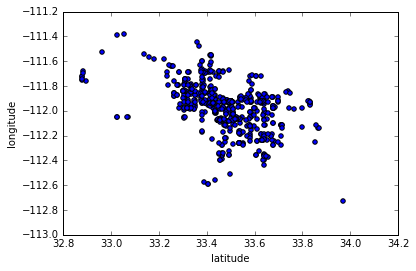

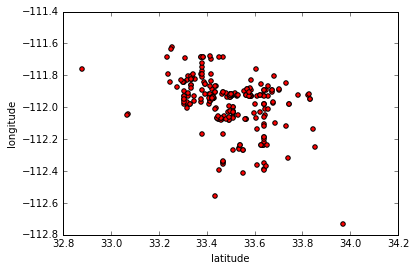

In [246]:
chosen_category[chosen_category.open == True].plot('latitude', 'longitude', c='b', kind='scatter')
chosen_category[chosen_category.open != True].plot('latitude', 'longitude', c='r', kind='scatter')
plt.plot()

In [247]:
# chosen_category.merge(, how='inner')
earliest_review = reviews.groupby('business_id')[['date']].agg(min).reset_index('business_id')
earliest_review['year'] = earliest_review['date'].apply(lambda x: x.year)
business_earliest_review = chosen_category.merge(earliest_review, how='inner')
# business_earliest_review.groupby(business_earliest_review, by=[business_earliest_review.date.year])
grouped = business_earliest_review.groupby('year')

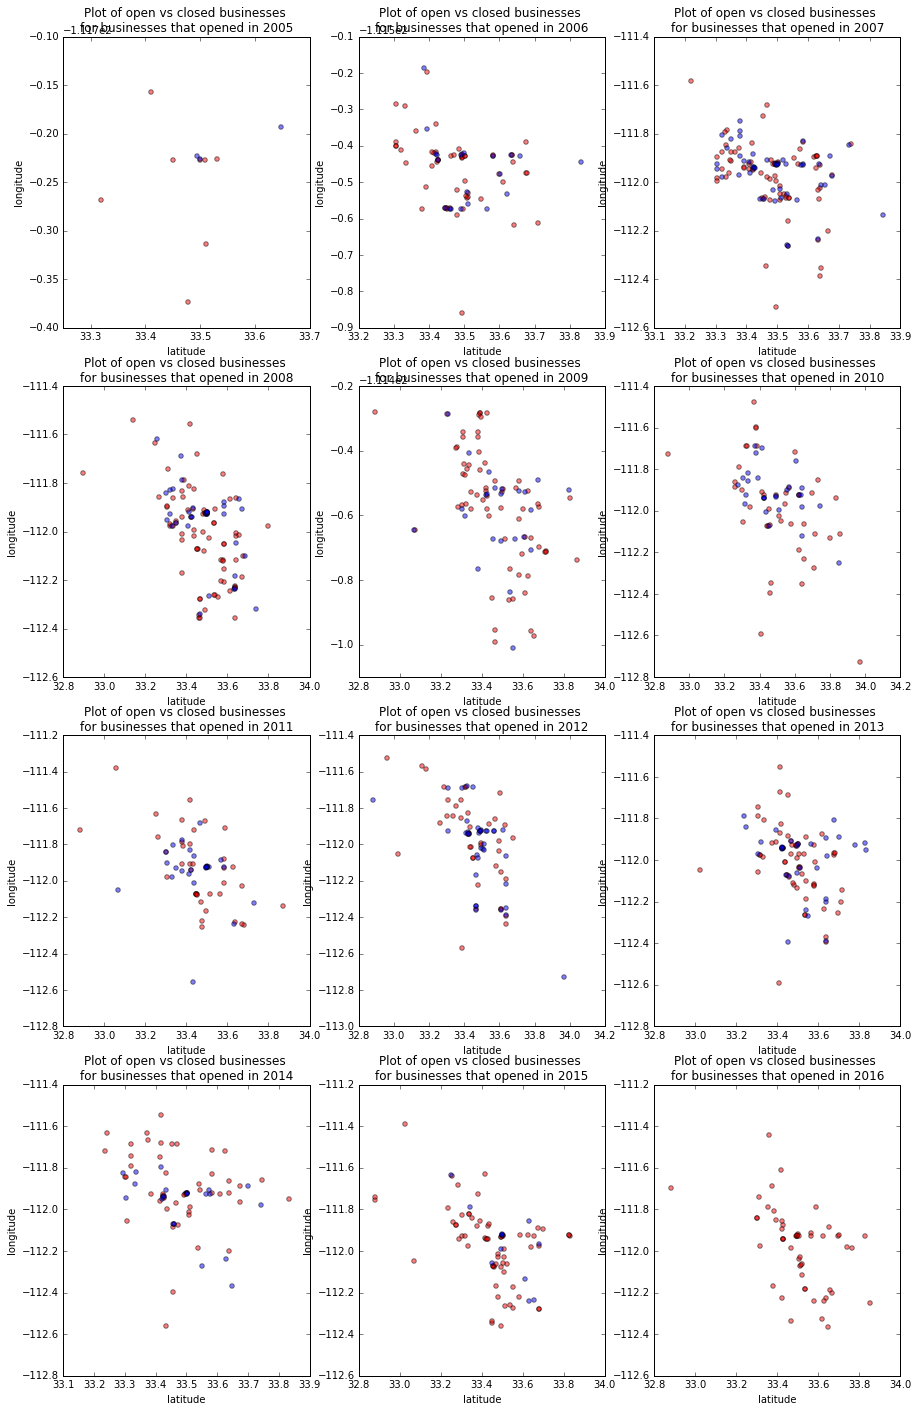

In [249]:
fig, axes = plt.subplots(4,3, figsize=(15,24))
axes = axes.flatten()

cmap=plt.cm.RdYlGn
colors = cm.rainbow(np.linspace(0, 1, len(grouped)))

i = 0
for year, group in grouped:
    if np.sum(group.open == True) > 0:
        group[group.open == True].plot('latitude', 'longitude', alpha=0.5, kind='scatter', c='r', ax=axes[i])
    if np.sum(group.open == False) > 0:
        group[group.open != True].plot('latitude', 'longitude', alpha=0.5, kind='scatter', ax=axes[i])
    axes[i].set_title('Plot of open vs closed businesses \nfor businesses that opened in %i'%year)
    i+=1

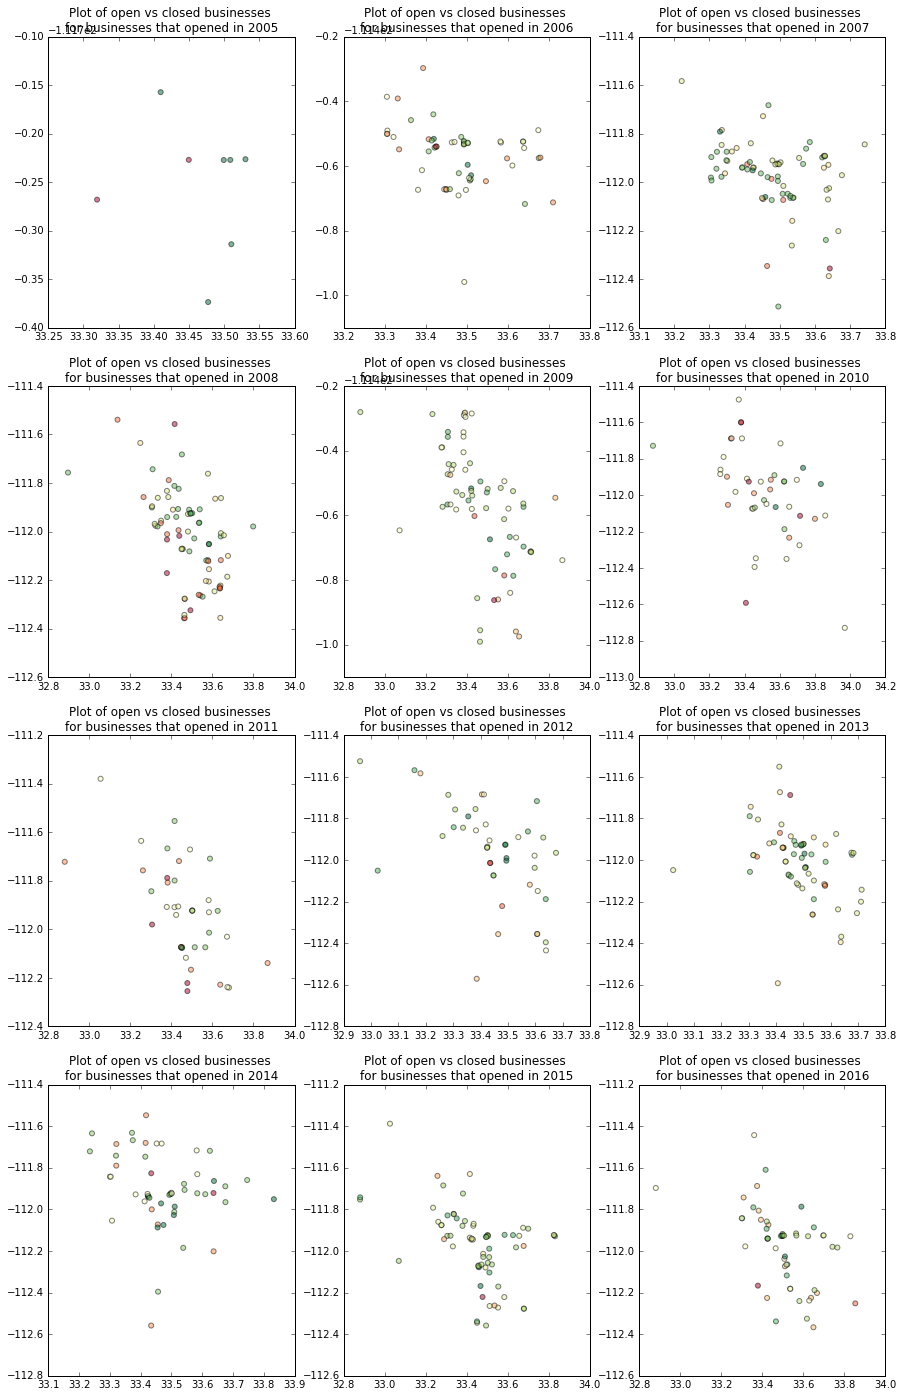

In [250]:
fig, axes = plt.subplots(4,3, figsize=(15,24))
axes = axes.flatten()

cmap=mpl.cm.RdYlGn
colors = cm.rainbow(np.linspace(0, 1, 10))

i = 0
for year, group in grouped:
#     group[group.open == True]
    open_group = group[group.open == True]
    colors=np.array(open_group.stars/5, dtype=np.float32)

    axes[i].scatter(
        open_group.latitude,
        open_group.longitude,
        c=colors,
        s=25,
        alpha=0.5,
        cmap=mpl.cm.RdYlGn)
    axes[i].set_title('Plot of open vs closed businesses \nfor businesses that opened in %i'%year)
    i+=1

### Time

In [262]:
def find_mode(values, num_bins):
    bins, edges = np.histogram(values, bins=num_bins)
    max_height_index = np.argmax(bins)
    mode = (edges[max_height_index] + edges[max_height_index + 1]) / 2.
    return mode

def sample_posterior(row, a, b, n_samples):
    stars = row['sum']
    total_ratings = row['count_nonzero']
    post_samples = np.random.beta(a + stars, b + (total_ratings - stars), n_samples)
    return find_mode(post_samples, 10)

# Use our biased popularity to rate businesses:
location = 'Phoenix'

city_df = businesses[businesses.location == location]
n_samples = 1000
a,b=8,8
businesses_sum_reviews = reviews.groupby(['business_id']).agg({"stars": [np.sum, np.count_nonzero]})['stars']
businesses_sum_reviews['count_nonzero'] *= 5
businesses_sum_reviews['rating'] = businesses_sum_reviews.apply(sample_posterior, axis=1, args=(a, b, n_samples))
businesses_sum_reviews = businesses_sum_reviews.reset_index('business_id')

In [284]:
businesses_with_weighted_rating = city_df.merge(businesses_sum_reviews[['rating', 'business_id']], how='inner')
businesses_with_weighted_rating = businesses_with_weighted_rating[businesses_with_weighted_rating.location == location]
categories = []
businesses_with_weighted_rating.apply(lambda x: categories.append(ast.literal_eval(x.categories)), axis=1)
None
# businesses_sum_reviews
# city_df.columns
# businesses_sum_reviews[['rating']].columns

In [285]:
popularity = dict()
for category in set([item for sublist in categories for item in sublist]):
    b = businesses_with_weighted_rating.apply(lambda x: x.rating if ast.literal_eval(x.categories) else 0, axis=1)
    popularity[category] = np.sum(b)/np.count_nonzero(b)

In [286]:
popularity

{'ATV Rentals/Tours': 0.6797267519447919,
 'Accessories': 0.6797267519447919,
 'Accountants': 0.6797267519447919,
 'Active Life': 0.6797267519447919,
 'Acupuncture': 0.6797267519447919,
 'Addiction Medicine': 0.6797267519447919,
 'Adult': 0.6797267519447919,
 'Adult Education': 0.6797267519447919,
 'Adult Entertainment': 0.6797267519447919,
 'Advertising': 0.6797267519447919,
 'Afghan': 0.6797267519447919,
 'African': 0.6797267519447919,
 'Air Duct Cleaning': 0.6797267519447919,
 'Airlines': 0.6797267519447919,
 'Airport Lounges': 0.6797267519447919,
 'Airport Shuttles': 0.6797267519447919,
 'Airport Terminals': 0.6797267519447919,
 'Airports': 0.6797267519447919,
 'Airsoft': 0.6797267519447919,
 'Allergists': 0.6797267519447919,
 'Amateur Sports Teams': 0.6797267519447919,
 'American (New)': 0.6797267519447919,
 'American (Traditional)': 0.6797267519447919,
 'Amusement Parks': 0.6797267519447919,
 'Anesthesiologists': 0.6797267519447919,
 'Animal Shelters': 0.6797267519447919,
 'Antiq